<h1> Week 1 Homework

<h2>Question 2.1</h2>
Describe a situation or problem from your job, everyday life, current events, etc., for which a classification model would be appropriate. List some (up to 5) predictors that you might use.

<b> Answer: </b>

In Petroleum Engineering, defining whether a rock section intersected by a well is a hydrocarbon bearing reservoir or not and whether it can be economically produced is critical for the future utilization of the well. 

Pay is an expression that denotes a portion of a reservoir that contains economically recoverable hydrocarbons. 

In order for a rock to be considered a pay rock, It must contain sufficient:
1. Porosity (void space in the reservoir rock to store the hydrocarbons),
2. Hydrocarbon saturation as opposed to water saturation,
3. Permeability to transmit the hydrocarbons through the reservoir and to the wellbore,
4. Reserves to be economically developed, etc.

The definition of suffcient varies from geological zone to another. Also the definition of economic reserves varies significantly depending on the location (onshore vs offshore) and many other factors.

Reference: https://glossary.oilfield.slb.com/en/Terms/p/pay.aspx

<p><p style="page-break-after:always;"></p></p>

<h2>Question 2.2</h2>
The files credit_card_data.txt (without headers) and credit_card_data-headers.txt (with headers) contain a dataset with 654 data points, 6 continuous and 4 binary predictor variables.  It has anonymized credit card applications with a binary response variable (last column) indicating if the application was positive or negative. The dataset is the “Credit Approval Data Set” from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Credit+Approval) without the categorical variables and without data points that have missing values.

<h3> Part 1 </h3>
Using the support vector machine function ksvm contained in the R package kernlab, find a good classifier for this data. Show the equation of your classifier, and how well it classifies the data points in the full data set.

<h3>Answer Part 1</h3>

In [1]:
# loading the dataset
# READ DATASET as Matrix
data <- as.matrix(read.table("credit_card_data-headers.txt", header = TRUE, sep = "\t"))
# Display Data
head(data)

A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
1,30.83,0.000,1.25,1,0,1,1,202,0,1
0,58.67,4.460,3.04,1,0,6,1,43,560,1
0,24.50,0.500,1.50,1,1,0,1,280,824,1
1,27.83,1.540,3.75,1,0,5,0,100,3,1
1,20.17,5.625,1.71,1,1,0,1,120,0,1
1,32.08,4.000,2.50,1,1,0,0,360,0,1


In [2]:
# convert data to data frame for easier handling and plotting using ggplot2 library
data_df <- as.data.frame(data)

<p><p style="page-break-after:always;"></p></p>

Descirbe data properties

In [3]:
print("Number of data points , columns in data")
dim(data_df)
print("Data Columns summary")
summary(data_df)

[1] "Number of data points , columns in data"


[1] 654  11

[1] "Data Columns summary"


       A1               A2              A3               A8        
 Min.   :0.0000   Min.   :13.75   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:0.0000   1st Qu.:22.58   1st Qu.: 1.040   1st Qu.: 0.165  
 Median :1.0000   Median :28.46   Median : 2.855   Median : 1.000  
 Mean   :0.6896   Mean   :31.58   Mean   : 4.831   Mean   : 2.242  
 3rd Qu.:1.0000   3rd Qu.:38.25   3rd Qu.: 7.438   3rd Qu.: 2.615  
 Max.   :1.0000   Max.   :80.25   Max.   :28.000   Max.   :28.500  
       A9              A10              A11              A12        
 Min.   :0.0000   Min.   :0.0000   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median : 0.000   Median :1.0000  
 Mean   :0.5352   Mean   :0.5612   Mean   : 2.498   Mean   :0.5382  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.: 3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :67.000   Max.   :1.0000  
      A14               A15              

<b> summary of data </b>

As described in the assignment, 
1. the data contains 654 data points
2. 6 continuous variables (A2, A3, A8, A11, A14, A15)
3. 4 binary variables (A1, A9, A10, A12)
4. R1 the binary response column

<u> for the continous columns, for example </u>

A2 ranges from 13.75 to 80.25

A14 ranges from 0 to 2000

A15 ranges from 0 to 100,000

it's clear that the data spans a variable wide range. As a result, scaling the data would be important to ensure accurate results

<p><p style="page-break-after:always;"></p></p>

<b> Start of SVM Analysis </b>

Loading the kknn "kernlab: Kernel-Based Machine Learning Lab" package

In [4]:
# load required library
# install.packages("kernlab")
options(warn=-1) # used to suppress warnings
library(kernlab)

A Sensitivity analysis was done on four different models <i>(note for all models the data was scaled)</i>:
1. rbfdot: Radial Basis kernel "Gaussian"
2. polydot: Polynomial kernel
3. vanilladot: Linear kernel
4. tanhdot: Hyperbolic tangent kernel

For each model, C was varied on an exponential manner from 0.0001 to 100,000 (10 Steps)

Finally Model Accuracy was calculated as follows:

Accuracy = Number of correctly predicted data points \ total number of data points

In [5]:
# list of all models
list_models <- c("polydot", "vanilladot", "rbfdot", "tanhdot")
model_names <- c("Polynomial Model", "Linear Model", "Gaussian Model", "Hyperbolic tangent Model")

# Sensitivity on C values
C_list <- c(0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000)

# vector to store Accuracy Results
Accuracy <- seq(1,10,1)

# DataFrame to store all the results
results_df <- data.frame()

In [6]:
# Outer loop for different models
for (model in 1:4)
{
  # Inner loop for different C Values
  for (i in 1:10)
  {
    # Create Model
    model_svm <- ksvm(data[,1:10], data[,11], type="C-svc", kernel=list_models[model], C=C_list[i], scaled=TRUE)
    # see what the model predicts
    pred <- predict(model_svm,data[,1:10])
    # see what fraction of the model’s predictions match the actual classification (Accuracy)
    Accuracy[i] <- sum(pred == data[,11]) / nrow(data)
  }
  # Creates a vector of model name
  model_col <- rep(model_names[model], times=10)
  # Binds the results to the results dataframe
  results_df <- rbind(results_df, data.frame(C_list, Accuracy, model_col))
}

 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 

Plot the results where X-axis is C value and Y-axis is the model accuracy

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:kernlab':

    alpha



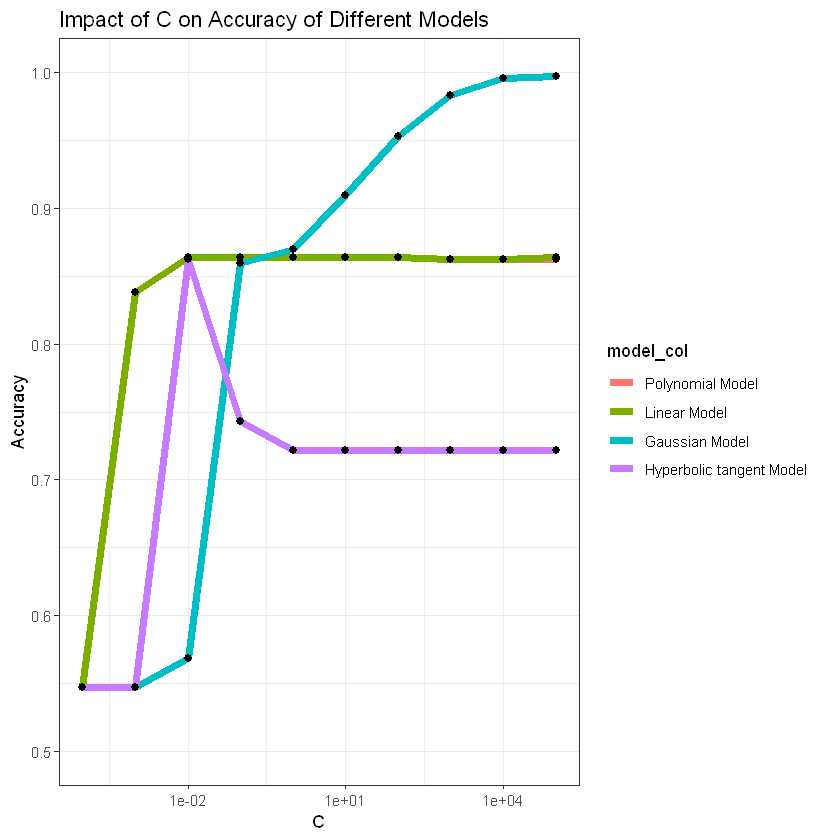

In [7]:
options(warn=-1) # used to suppress warnings
library(ggplot2)
C_plot <-  ggplot(results_df, aes(x=C_list, y=Accuracy, colour=model_col)) +
  geom_line(size=2)+
  geom_point(size=2, color="black")+
  ggtitle("Impact of C on Accuracy of Different Models")+
  labs(x="C", Y="Accuracy")+
  scale_x_continuous(trans = 'log10')+
  ylim(0.5, 1)+
  theme_bw()
C_plot

<i> Note the X axis was tranformed to log scale to better show the results given the wide range of C values used</i>

It was noted that when C = 0.0001, the model accuracy was at it's worst.
As a result, The C = 0.0001 model was tested to see the frequency of 1 and 0 responses.

In [8]:
# Create C=0.0001 Model
poor_C_model_svm <- ksvm(data[,1:10], data[,11], type="C-svc", kernel="vanilladot", C=0.0001, scaled=TRUE)
# see what the model predicts
pred <- predict(poor_C_model_svm,data[,1:10])
# see Model's Accuracy
poor_C_model_svm_Accuracy <- round(sum(pred == data[,11]) / nrow(data),4)
print("Poor C model accuracy")
poor_C_model_svm_Accuracy
print("Number of False responses R1==0 predicted by the model")
sum(pred == 0)
print("Percentage of False responses R1==0 predicted by the model")
sum(pred == 0)/nrow(data)*100

 Setting default kernel parameters  
[1] "Poor C model accuracy"


[1] 0.5474

[1] "Number of False responses R1==0 predicted by the model"


[1] 654

[1] "Percentage of False responses R1==0 predicted by the model"


[1] 100

As a result, As highlighted in the Assignment description, when C is poorly selected, the majority of the responses will be either 0 or 1 (in our case, when C=0.0001, all responses will be 0)

<b>Conclusions from the plot</b> 
1. Linear and Polynomial models are overlapping (producing the same results for the same C value)
2. For both Linear and Polynomial models, the Accuracy increases with increasing C value up to C = 0.01 then flattens at 0.862 for any higher values of C. Further models will use a C = 1 assumption
3. For the Hyperbolic tangent model, the optimal C value is 0.01 with any further increase in C value results in a reduction in the Accuracy. Note that if that model was to be used, another loop to refine the C value would be needed given the wide range of the C steps.
4. For the Gaussian model, increasing the C value increases the accuracy of the model. However with C = 100,000, the model's accuracy increases to ~1.0. Further validation and testing would be required as the model could be over-fitting.

<p><p style="page-break-after:always;"></p></p>

<b>Creating the basic Linear model for further analyses<b/>

In [9]:
# Create Basic Model
model_svm <- ksvm(data[,1:10], data[,11], type="C-svc", kernel="vanilladot", C=1, scaled=TRUE)
# see what the model predicts
pred <- predict(model_svm,data[,1:10])
# see Model's Accuracy
basic_model_accuracy <- round(sum(pred == data[,11]) / nrow(data),4)
print("Basic Linear model accuracy")
basic_model_accuracy

 Setting default kernel parameters  
[1] "Basic Linear model accuracy"


[1] 0.8639

<b> Quality checking the fraction of True responses (R1 == 1) in both the data set and the prediction </b>

In [10]:
cat("Fraction of True responses in Data set", round(sum(data[,"R1"]==1)/nrow(data),4))

Fraction of True responses in Data set 0.4526

In [11]:
cat("Fraction of True responses in prediction", round(sum(pred==1)/nrow(data),4))

Fraction of True responses in prediction 0.5367

<b> Conclusion </b>
The model appears to overestimate the True responses however not excessively.

In [12]:
# calculate a0
a0 <- model_svm@b
print("a0, the intercept is")
round(a0,4)
# calculate a1…am
a <- colSums(model_svm@xmatrix[[1]] * model_svm@coef[[1]])
print("The cofficeints of the different columns")
round(a,4)

[1] "a0, the intercept is"


[1] -0.0815

[1] "The cofficeints of the different columns"


A1      A2      A3      A8      A9     A10     A11     A12     A14     A15 
-0.0011 -0.0009 -0.0016  0.0029  1.0047 -0.0030 -0.0002 -0.0006 -0.0013  0.1064

<p><p style="page-break-after:always;"></p></p>

Analyzing the Coffcients results

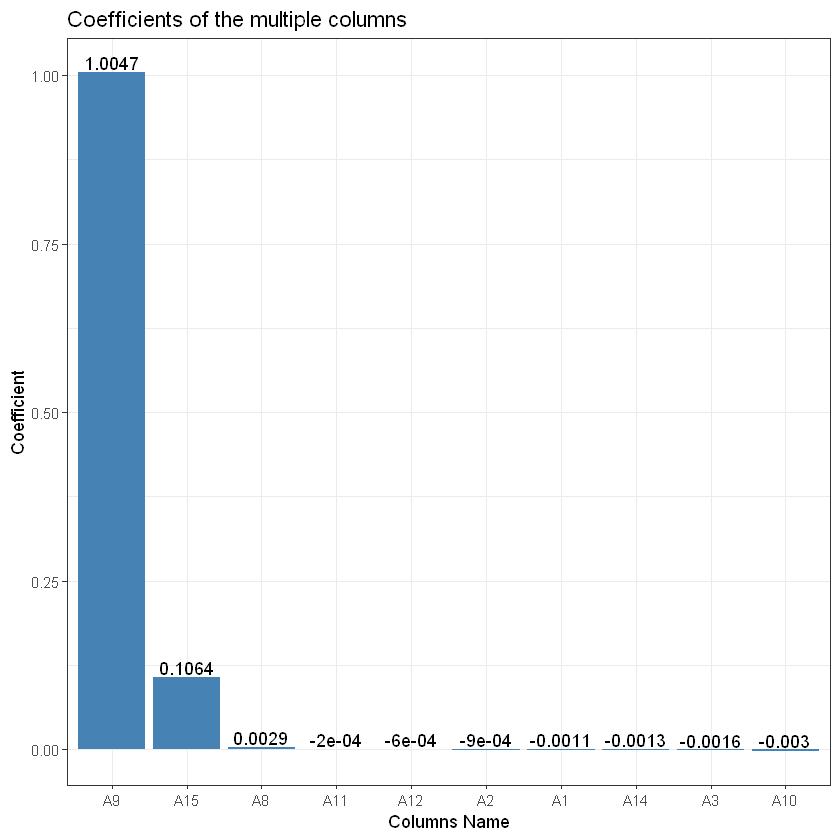

In [13]:
# plot coefficients
# create a dataframe to store the coffcients
a_df <- data.frame(names(a), a)
colnames(a_df) <-c("Column_name", "Coefficient")
# Plot the data
Coff_plot <- ggplot(a_df, aes(x=reorder(Column_name, -Coefficient), y=Coefficient, group=1))+
  geom_bar(stat="identity", fill="steelblue")+
  labs(x="Columns Name", Y="Cofficient")+
  ggtitle("Coefficients of the multiple columns")+
  geom_text(aes(label=round(Coefficient,4)), position=position_dodge(width=0.9), vjust=-0.25)+
  theme_bw()
print(Coff_plot)

<b>Conclusion from the plot</b> 

2 Columns (A9 & A15) has a high coffcient indicating a strong correlation with the response vector while all other columns' coffceints are almost 0

<p><p style="page-break-after:always;"></p></p>

To Validate the concept, A simple model was built using only these two columns.
The concept is to compare the simple model accuray with the initial model accuracy

In [14]:
# Building Simple Model
simple_model_svm <- ksvm(data[,c("A9", "A15")], data[,11], type="C-svc", kernel="vanilladot", C=100, scaled=TRUE)
# see what the model predicts
simple_pred <- predict(simple_model_svm,data[,c("A9", "A15")])
# see what fraction of the model’s predictions match the actual classification
simple_model_accuracy <- round(sum(simple_pred == data[,11]) / nrow(data),4)
print("Simple Linear model accuracy")
simple_model_accuracy
print("Remember Initial Linear model accuracy")
basic_model_accuracy

 Setting default kernel parameters  
[1] "Simple Linear model accuracy"


[1] 0.8639

[1] "Remember Initial Linear model accuracy"


[1] 0.8639

<b> Conclusion, Both models results the in same accuracy. Only Column A9 and A15 are correlatble with the R1 response </b> 

In [15]:
# Calculate coffcients of the simple model
# calculate a0
a0 <- simple_model_svm@b
print("a0, the intercept is")
round(a0,4)
# calculate a1…am
a <- colSums(simple_model_svm@xmatrix[[1]] * simple_model_svm@coef[[1]])
print("The cofficeints of the different columns")
round(a,4)

[1] "a0, the intercept is"


[1] -0.0813

[1] "The cofficeints of the different columns"


A9    A15 
1.0086 0.1060

<p><p style="page-break-after:always;"></p></p>

<b> Final Models equations </b>

Initial Model equation

Response = -0.0011 x A1 -9e-04 x A2 -0.0016 x A3 + 0.0029 x A8 + 1.0047 x A9 -0.003 x A10 -2e-04 x A11 -6e-04 x A12 -0.0013 x A13 + 0.1064 x A15 - 0.0813

Final Model equation 

Response = 1.0086 x A9 + 0.106 x A15 - 0.0813

For both models, 
1. if Response >= 0 then Response  = 1
2. if Response < 0 then Response  = 0

<b> Manual calculations using the equation for the simple model </b>

In [16]:
# rescaling columns
temp_data <- data
temp_data[,"A15"] <- scale(data[,"A15"])
temp_data[,"A9"] <- scale(data[,"A9"])
# Manual Calculations
Response <- (temp_data[,"A9"] * 1.0086 + temp_data[,"A15"]*0.106 - 0.0813)
# If Response >=0 , 1 else 0
Response_final <- as.numeric(Response >= 0)
# print total number of mis-matches
print("Total number of mismatches")
sum(Response_final!=simple_pred)

[1] "Total number of mismatches"


[1] 0

In conclusion, The KSVM model and the manual equation are identical

As a final Quality and logic check since A9 column coffcient is ~1, A9 (which is a binary column) should be directly correlated to the response vector.
Using it alone to predict the reponse vector should result in a high accuracy

In [17]:
# print Correlation for column A9 alone
A9_Accuracy <- sum(data[,"A9"] == data[,"R1"]) / nrow(data)
print(c("A9 Correlation with Target column (R1)", round(A9_Accuracy,4)))

[1] "A9 Correlation with Target column (R1)"
[2] "0.8624"                                


Indeed using A9 as a linear direct predictor results in <b> an accuracy of 0.8624 </b> as compared to 0.8639 for the model including A15 or all other columns

<p><p style="page-break-after:always;"></p></p>

<b> Part 1 Conclusions: </b>

1. Based on testing, two columns only A9 & A15 has the highest impact on the response.
2. Using these 2 columns (or all the columns) has an accuracy of 86.4%
3. Any C value >= 0.01 and <=100,000 (limit of testing) results in the same Linear SVM Model results.
4. The model equation is 

Response = 1.0086 x A9 + 0.106 x A15 - 0.0813
1. if Response >= 0 then Response = 1
2. If Response < 0 then Response = 0

<p><p style="page-break-after:always;"></p></p>

<h3> Part 2 </h3>
Using the k-nearest-neighbors classification function kknn contained in the R kknn package, suggest a good value of k, and show how well it classifies that data points in the full data set.  Don’t forget to scale the data (scale=TRUE in kknn)

In [18]:
# load required library
#install.packages("kknn")
options(warn=-1) # used to suppress warnings
library(kknn)

An initial Sensitivity analysis was done for k values ranging from 5 to 50 increment 5
Model accuracy was calculated as defined previously

In [19]:
# KNN Solution
Accuracy <- seq(1,10,1)
k_list <- seq(5,50,5)
# outer k values loop
for (j in 1:10)
{
  N <- nrow(data_df)
  results <- vector(length=N)
    # inner loop for all rows 
  for (i in 1:N) {
    KNN_model <- kknn(data_df[-i,11]~., train=data_df[-i,1:10], test=data_df[i,1:10], k=k_list[j], scale=TRUE)
    results[i] <- fitted(KNN_model)
  }
  Accuracy[j] <- sum(round(results,0) == data[,11]) / nrow(data)
}

Plot the results where X-axis is K value and Y-axis is the model accuracy

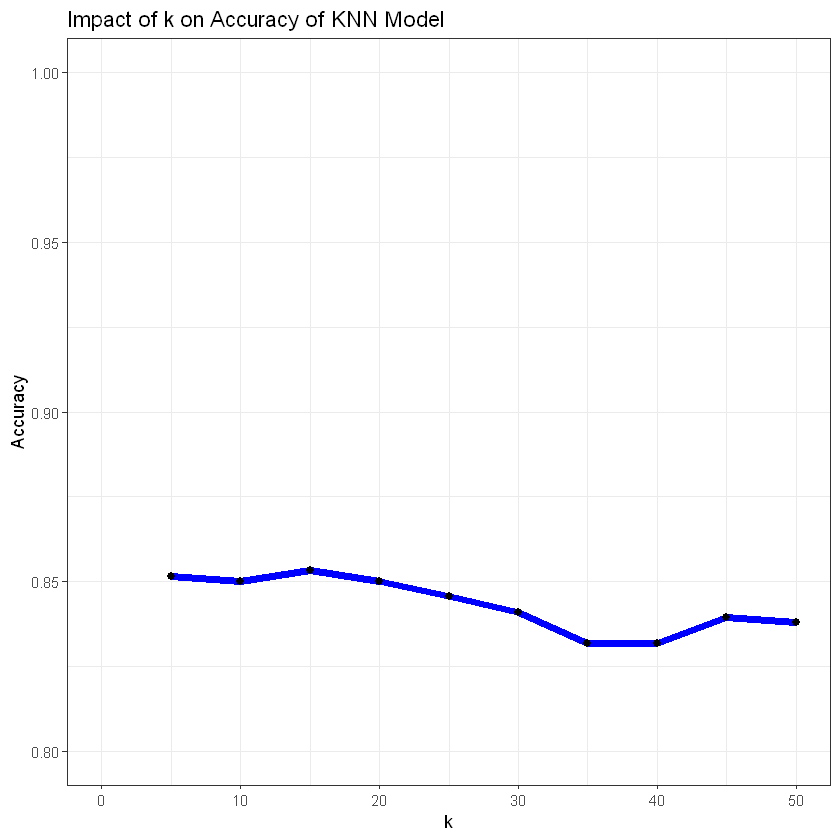

In [20]:
knn_df <- data.frame(k_list, Accuracy)
knn_plot <-  ggplot(knn_df, aes(x=k_list, y=Accuracy)) +
  geom_line(size=2, color="blue")+
  geom_point(size=2, color="black")+
  ggtitle("Impact of k on Accuracy of KNN Model")+
  labs(x="k", Y="Accuracy")+
  ylim(0.8, 1)+
  xlim(0, 50)+
  theme_bw()
knn_plot

The analysis showed that the optimal K value is around 10 with further increasing or decreasing the k value results in lower Model's accuracy
As a result, the experiment was repeated with k ranging from 1 to 15 with increments of 1.

In [21]:
Accuracy <- seq(1,15,1)
k_list <- seq(1,15,1)
for (j in 1:15)
{
  N <- nrow(data_df)
  results <- vector(length=N)
  for (i in 1:N) {
    KNN_model <- kknn(data_df[-i,11]~., train=data_df[-i,1:10], test=data_df[i,1:10], k=k_list[j], scale=TRUE)
    results[i] <- fitted(KNN_model)
  }
  Accuracy[j] <- sum(round(results,0) == data[,11]) / nrow(data)
}

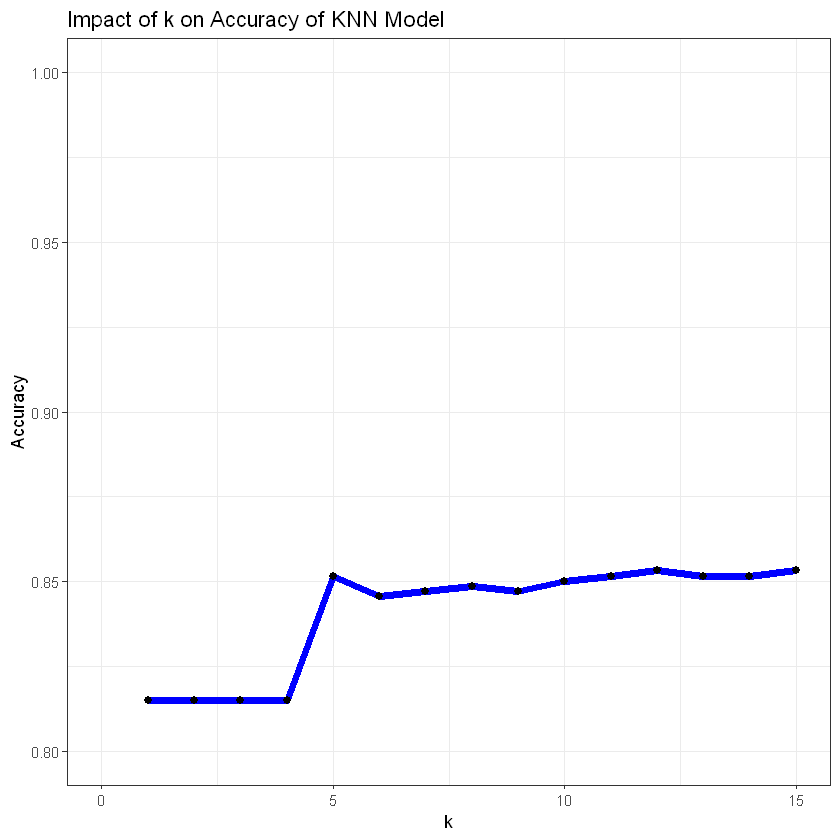

In [22]:
knn_df <- data.frame(k_list, Accuracy)
knn_plot <-  ggplot(knn_df, aes(x=k_list, y=Accuracy)) +
  geom_line(size=2, color="blue")+
  geom_point(size=2, color="black")+
  ggtitle("Impact of k on Accuracy of KNN Model")+
  labs(x="k", Y="Accuracy")+
  ylim(0.8, 1)+
  xlim(0, 15)+
  theme_bw()
knn_plot

Although with minor differences, k = 12 or k=15 results in the highest model Accuracy

<p><p style="page-break-after:always;"></p></p>

<b> Final KNN Model </b>

In [23]:
N <- nrow(data_df)
results <- vector(length=N)
# inner loop for all rows 
for (i in 1:N) {
KNN_model <- kknn(data_df[-i,11]~., train=data_df[-i,1:10], test=data_df[i,1:10], k=12, scale=TRUE)
results[i] <- fitted(KNN_model)
}
Accuracy <- sum(round(results,0) == data[,11]) / nrow(data)
print("Final KNN Model Accuracy")
round(Accuracy, 4)

[1] "Final KNN Model Accuracy"


[1] 0.8532

<b> Quality checking the fraction of True responses (R1 == 1) in both the data set and the prediction </b> 

In [24]:
cat("Fraction of True responses in Data set", round(sum(data[,"R1"]==1)/nrow(data),4))

Fraction of True responses in Data set 0.4526

In [25]:
cat("Fraction of True responses in Data set", round(sum(round(results,0)==1)/nrow(data),4))

Fraction of True responses in Data set 0.4587

As opposed to the Linear SVM model, KNN model although has a slightly lower accuracy (0.8532 compared to 0.8639) but it has a more accurate percentage of True responses when compared to the dataset.

<b>Notes of the KNN model:</b>

Looping through all the points is ineffcient in terms of computation.

Alternatively, we can split the data into taining and testing database to be more efficient. 

<p><p style="page-break-after:always;"></p></p>

<h2> Final Conclusions </h2>

1. KNN optimal k value is 12 or 15 with model accuracy of 85.3%
2. SVM linear model optimal C value is higher than 0.01 and less than 100,000 (limit of testing) with model accuracy of 86.4%
3. Column A9 has the highest correlation with the response vector followed by columns A15 while all other columns has a much lower impact on the model results
4. The SVM linear model tends to over-estimate the True responses (54%) while KNN model has a more accurate percentage of True responses (45.9%) which is 0.6% higher than the percentage of True responses in the dataset